<a href="https://colab.research.google.com/github/DAFFAYORIKO/Proposal-ANN/blob/main/Code_Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial.distance import cdist
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DataRS = pd.read_excel('https://raw.githubusercontent.com/DAFFAYORIKO/Proposal-ANN/main/DataCleaned.xlsx')
DataRS

,FID,RUMAH_SAKIT,X,Y
0,sebaran_rumah_sakit_pt_50k_2023.173,RS Umum Mitra Keluarga Cibubur,106.9184,-6.3756
1,sebaran_rumah_sakit_pt_50k_2023.1,RS Paru Dr. M. Goenawan Partowidigdo,106.9396,-6.6880
2,sebaran_rumah_sakit_pt_50k_2023.2,RS Umum Bhakti Yudha,106.8062,-6.3964
3,sebaran_rumah_sakit_pt_50k_2023.3,RS Umum Daerah Cibinong,106.8306,-6.4729
4,sebaran_rumah_sakit_pt_50k_2023.4,RS Umum Daerah Ciawi,106.8531,-6.6599
...,...,...,...,...
397,sebaran_rumah_sakit_pt_50k_2023.398,RS Ibu dan Anak Parahyangan,107.4635,-6.8663
398,sebaran_rumah_sakit_pt_50k_2023.399,RS Hamori,107.7913,-6.5271
399,sebaran_rumah_sakit_pt_50k_2023.400,RS Umum Mayapada Hospital Bandung,107.6347,-6.9485
400,sebaran_rumah_sakit_pt_50k_2023.401,RS Paragon,106.8859,-6.4735


In [ ]:
# Membaca data provinsi sebagai polygon
JawaBarat = gpd.read_file('https://raw.githubusercontent.com/DAFFAYORIKO/Proposal-ANN/main/Jawa_Barat_ADMIN_BPS.shp')
JawaBarat

,ADM0_EN,date,validOn,PROVINCE,Kabupaten,PRV2,geometry
0,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Bandung,Jawa_Barat,"POLYGON ((107.73309 -6.81400, 107.73354 -6.814..."
1,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Bandung Barat,Jawa_Barat,"POLYGON ((107.40945 -6.68851, 107.40986 -6.688..."
2,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Bekasi,Jawa_Barat,"POLYGON ((107.07568 -5.93473, 107.07682 -5.935..."
3,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Bogor,Jawa_Barat,"POLYGON ((106.97083 -6.30274, 106.97064 -6.303..."
4,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Ciamis,Jawa_Barat,"POLYGON ((108.35998 -7.05155, 108.36029 -7.052..."
5,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Cianjur,Jawa_Barat,"POLYGON ((107.23021 -6.60494, 107.23037 -6.604..."
6,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Cirebon,Jawa_Barat,"MULTIPOLYGON (((108.68501 -6.76990, 108.68411 ..."
7,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Garut,Jawa_Barat,"POLYGON ((107.91816 -6.94760, 107.91840 -6.947..."
8,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Indramayu,Jawa_Barat,"POLYGON ((108.20029 -6.22426, 108.20202 -6.227..."
9,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Karawang,Jawa_Barat,"POLYGON ((107.11263 -5.95518, 107.11470 -5.957..."


In [ ]:
# Menggabungkan koordinat latitude dan longitude menjadi geometri titik
geometry = [Point(xy) for xy in zip(DataRS['X'], DataRS['Y'])]
crs = {'init': 'epsg:4326'}  # EPSG code untuk WGS84
DataRS_gdf = gpd.GeoDataFrame(DataRS, crs=crs, geometry=geometry)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# Melakukan join spasial antara DataRS dan batas administratif kota di Jawa Barat
RS_kota_JawaBarat = gpd.sjoin(DataRS_gdf, JawaBarat, op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-5-04e882f4107d>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  RS_kota_JawaBarat = gpd.sjoin(DataRS_gdf, JawaBarat, op='within')


In [ ]:
# Menampilkan data hasil join
RS_kota_JawaBarat

,FID,RUMAH_SAKIT,X,Y,geometry,index_right,ADM0_EN,date,validOn,PROVINCE,Kabupaten,PRV2
0,sebaran_rumah_sakit_pt_50k_2023.173,RS Umum Mitra Keluarga Cibubur,106.9184,-6.3756,POINT (106.91840 -6.37560),12,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Kota Bekasi,Jawa_Barat
69,sebaran_rumah_sakit_pt_50k_2023.69,RS Umum Daerah dr. Chasbullah Abdulmadjid,107.0007,-6.2421,POINT (107.00070 -6.24210),12,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Kota Bekasi,Jawa_Barat
70,sebaran_rumah_sakit_pt_50k_2023.70,RS Mekar Sari,107.0109,-6.2329,POINT (107.01090 -6.23290),12,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Kota Bekasi,Jawa_Barat
71,sebaran_rumah_sakit_pt_50k_2023.71,RS Helsa,106.9211,-6.2963,POINT (106.92110 -6.29630),12,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Kota Bekasi,Jawa_Barat
73,sebaran_rumah_sakit_pt_50k_2023.73,RS Seto Hasbadi,106.9888,-6.2018,POINT (106.98880 -6.20180),12,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Kota Bekasi,Jawa_Barat
...,...,...,...,...,...,...,...,...,...,...,...,...
194,sebaran_rumah_sakit_pt_50k_2023.194,RS Umum Medimas,108.5399,-6.7427,POINT (108.53990 -6.74270),15,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Kota Cirebon,Jawa_Barat
282,sebaran_rumah_sakit_pt_50k_2023.282,RS Ibu dan Anak Cahaya Bunda,108.5392,-6.7336,POINT (108.53920 -6.73360),15,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Kota Cirebon,Jawa_Barat
171,sebaran_rumah_sakit_pt_50k_2023.170,RS Umum Daerah Singaparna Medika Citrautama,108.1061,-7.3586,POINT (108.10610 -7.35860),26,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Tasikmalaya,Jawa_Barat
308,sebaran_rumah_sakit_pt_50k_2023.308,RS Ibu dan Anak Respati,108.1536,-7.3362,POINT (108.15360 -7.33620),26,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Tasikmalaya,Jawa_Barat


In [ ]:
# Menghitung jumlah RS di setiap kota
jumlah_RS_per_kota = RS_kota_JawaBarat['Kabupaten'].value_counts()

# Membuat DataFrame dari hasil perhitungan
Data_N_RS = pd.DataFrame({'Kabupaten': jumlah_RS_per_kota.index, 'Jumlah_RS': jumlah_RS_per_kota.values})

# Menampilkan DataFrame
print(Data_N_RS)

           Kabupaten  Jumlah_RS
0             Bekasi         53
1        Kota Bekasi         46
2       Kota Bandung         39
3              Bogor         30
4         Kota Depok         26
5           Karawang         26
6         Kota Bogor         22
7   Kota Tasikmalaya         14
8          Indramayu         12
9            Cirebon         12
10          Kuningan         12
11            Subang         11
12        Purwakarta         11
13           Bandung         11
14      Kota Cirebon         11
15     Bandung Barat         10
16          Sukabumi          9
17       Kota Cimahi          8
18             Garut          7
19            Ciamis          6
20     Kota Sukabumi          6
21        Majalengka          5
22           Cianjur          5
23       Kota Banjar          4
24          Sumedang          3
25       Tasikmalaya          2
26       Pangandaran          1


In [ ]:
# Hitung matriks jarak antar titik RS dalam setiap kota
coordinates = RS_kota_JawaBarat['geometry'].apply(lambda geom: (geom.x, geom.y)).tolist()
coordinates
# Calculate the distance matrix
dist_matrix = cdist(coordinates, coordinates)
# Print the distance matrix
print(dist_matrix)
# Ambil nilai jarak tetangga terdekat untuk setiap titik
nearest_neighbor_distance = np.min(np.where(dist_matrix > 0, dist_matrix, np.inf), axis=1)

# Hitung rata-rata jarak tetangga terdekat aktual
mean_nearest_neighbor_distance_actual = np.mean(nearest_neighbor_distance)

# Hitung nilai harapan rata-rata jarak tetangga terdekat (jika acak)
n = len(RS_kota_JawaBarat)
mean_nearest_neighbor_distance_expected = 0.5 * (1 / np.sqrt(n / RS_kota_JawaBarat.total_bounds[0]))

# Hitung parameter T
T = mean_nearest_neighbor_distance_actual / mean_nearest_neighbor_distance_expected

print("Nilai Parameter T untuk Tiap Kota:")
print(T)

[[0.         0.15682965 0.17005746 ... 1.5417264  1.56475921 2.16603426]
 [0.15682965 0.         0.01373608 ... 1.57114016 1.58941285 2.18644232]
 [0.17005746 0.01373608 0.         ... 1.57056153 1.58840618 2.18486368]
 ...
 [1.5417264  1.57114016 1.57056153 ... 0.         0.05251676 0.62952091]
 [1.56475921 1.58941285 1.58840618 ... 0.05251676 0.         0.601816  ]
 [2.16603426 2.18644232 2.18486368 ... 0.62952091 0.601816   0.        ]]
Nilai Parameter T untuk Tiap Kota:
0.08581079685569941


In [ ]:
# Fungsi untuk menghitung nilai T berdasarkan matriks jarak
def calculate_T(distances):
    mean_distance = np.mean(distances)
    expected_distance = 0.5 * np.sqrt(np.pi / len(distances))
    T = mean_distance / expected_distance
    return T

In [ ]:
# Buat dictionary untuk menyimpan nilai T tiap kota/kabupaten
T_per_kota = {}

# Kelompokkan RS berdasarkan kota/kabupaten
grouped_RS = RS_kota_JawaBarat.groupby('Kabupaten')
grouped_RS

In [ ]:
# Iterasi melalui setiap kota/kabupaten
for kota, group in grouped_RS:
    # Ambil matriks jarak antar titik RS dalam kota/kabupaten tertentu
    distances = cdist(group['geometry'].apply(lambda geom: (geom.x, geom.y)).tolist(),
                      group['geometry'].apply(lambda geom: (geom.x, geom.y)).tolist())
    # Hitung nilai T untuk kota/kabupaten tersebut
    T = calculate_T(distances)
    # Simpan nilai T ke dalam dictionary
    T_per_kota[kota] = T

# Tampilkan nilai T untuk setiap kota/kabupaten
for kota, T in T_per_kota.items():
    print(f'Kota/Kabupaten: {kota}, T: {T}')

Kota/Kabupaten: Bandung, T: 0.5766798544571381
Kota/Kabupaten: Bandung Barat, T: 0.2732420909679742
Kota/Kabupaten: Bekasi, T: 0.8534307679815308
Kota/Kabupaten: Bogor, T: 0.9777360711730596
Kota/Kabupaten: Ciamis, T: 0.17077761816925957
Kota/Kabupaten: Cianjur, T: 0.45642742762924415
Kota/Kabupaten: Cirebon, T: 0.4910697160231282
Kota/Kabupaten: Garut, T: 0.42346034645105773
Kota/Kabupaten: Indramayu, T: 0.6813648800654253
Kota/Kabupaten: Karawang, T: 0.7168888055809837
Kota/Kabupaten: Kota Bandung, T: 0.308294583633284
Kota/Kabupaten: Kota Banjar, T: 0.09314589064477048
Kota/Kabupaten: Kota Bekasi, T: 0.5366212142096067
Kota/Kabupaten: Kota Bogor, T: 0.19201406720277936
Kota/Kabupaten: Kota Cimahi, T: 0.06461625085379111
Kota/Kabupaten: Kota Cirebon, T: 0.08591518515129866
Kota/Kabupaten: Kota Depok, T: 0.355662818823225
Kota/Kabupaten: Kota Sukabumi, T: 0.05722817461195823
Kota/Kabupaten: Kota Tasikmalaya, T: 0.10720098283217984
Kota/Kabupaten: Kuningan, T: 0.26646075213771303
Kota/

In [ ]:
# Buat DataFrame dari dictionary T_per_kota
Data_T_RS = pd.DataFrame(list(T_per_kota.items()), columns=['Kota/Kabupaten', 'T'])

# Mengganti nama kolom 'Kota/Kabupaten' menjadi 'Kabupaten'
Data_T_RS = Data_T_RS.rename(columns={'Kota/Kabupaten': 'Kabupaten'})

# Menggabungkan dua DataFrame berdasarkan kolom 'Kabupaten'
Data_T_N = pd.merge(Data_N_RS, Data_T_RS, on='Kabupaten')

# Menampilkan DataFrame hasil penggabungan
Data_T_N

,Kabupaten,Jumlah_RS,T
0,Bekasi,53,0.853431
1,Kota Bekasi,46,0.536621
2,Kota Bandung,39,0.308295
3,Bogor,30,0.977736
4,Kota Depok,26,0.355663
5,Karawang,26,0.716889
6,Kota Bogor,22,0.192014
7,Kota Tasikmalaya,14,0.107201
8,Indramayu,12,0.681365
9,Cirebon,12,0.491070


In [ ]:
jumlah_RS_per_kota.to_excel('data N.xlsx', index=False)

In [ ]:
# Fungsi untuk menghitung rata-rata jarak tetangga terdekat dari data aktual (d_bar)
def calculate_actual_mean_distance(distances):
    return np.mean(distances)

# Fungsi untuk menghitung nilai harapan rata-rata jarak tetangga terdekat (d_bar_star)
def calculate_expected_mean_distance(n):
    return 0.5 * np.sqrt(np.pi / n)

# Buat dictionary untuk menyimpan hasil perhitungan
mean_distances_per_kota = {}
expected_mean_distances_per_kota = {}

# Iterasi melalui setiap kota/kabupaten
for kota, group in grouped_RS:
    # Ambil matriks jarak antar titik RS dalam kota/kabupaten tertentu
    distances = cdist(group['geometry'].apply(lambda geom: (geom.x, geom.y)).tolist(),
                      group['geometry'].apply(lambda geom: (geom.x, geom.y)).tolist())
    # Hitung rata-rata jarak tetangga terdekat dari data aktual (d_bar)
    mean_distance = calculate_actual_mean_distance(distances)
    # Hitung nilai harapan rata-rata jarak tetangga terdekat (d_bar_star)
    expected_mean_distance = calculate_expected_mean_distance(len(group))
    # Simpan hasil perhitungan ke dalam dictionary
    mean_distances_per_kota[kota] = mean_distance
    expected_mean_distances_per_kota[kota] = expected_mean_distance

# Buat DataFrame dari dictionary hasil perhitungan
df_mean_distances = pd.DataFrame(list(mean_distances_per_kota.items()), columns=['Kota/Kabupaten', 'Mean Distance'])
df_expected_mean_distances = pd.DataFrame(list(expected_mean_distances_per_kota.items()), columns=['Kota/Kabupaten', 'Expected Mean Distance'])

# Tampilkan DataFrame
print("Mean Distances:")
print(df_mean_distances)
print("Expected Mean Distances:")
print(df_expected_mean_distances)


Mean Distances:
      Kota/Kabupaten  Mean Distance
0            Bandung       0.154093
1      Bandung Barat       0.076576
2             Bekasi       0.103890
3              Bogor       0.158200
4             Ciamis       0.061787
5            Cianjur       0.180897
6            Cirebon       0.125631
7              Garut       0.141843
8          Indramayu       0.174315
9           Karawang       0.124598
10      Kota Bandung       0.043750
11       Kota Banjar       0.041274
12       Kota Bekasi       0.070119
13        Kota Bogor       0.036280
14       Kota Cimahi       0.020246
15      Kota Cirebon       0.022957
16        Kota Depok       0.061815
17     Kota Sukabumi       0.020705
18  Kota Tasikmalaya       0.025391
19          Kuningan       0.068169
20        Majalengka       0.085100
21       Pangandaran       0.000000
22        Purwakarta       0.059585
23            Subang       0.142570
24          Sukabumi       0.233326
25          Sumedang       0.082560
26       Tas

In [ ]:
# Gabungkan kedua DataFrame berdasarkan kolom 'Kota/Kabupaten'
merged_distances = pd.merge(df_mean_distances, df_expected_mean_distances, on='Kota/Kabupaten')

# Ganti nama kolom 'Kota/Kabupaten' menjadi 'Kabupaten'
merged_distances = merged_distances.rename(columns={'Kota/Kabupaten': 'Kabupaten'})

# Tampilkan DataFrame hanya dengan kolom yang diinginkan
Data_D = merged_distances[['Kabupaten', 'Mean Distance', 'Expected Mean Distance']]

# Print output DataFrame
print(Data_D)


           Kabupaten  Mean Distance  Expected Mean Distance
0            Bandung       0.154093                0.267207
1      Bandung Barat       0.076576                0.280250
2             Bekasi       0.103890                0.121733
3              Bogor       0.158200                0.161802
4             Ciamis       0.061787                0.361801
5            Cianjur       0.180897                0.396333
6            Cirebon       0.125631                0.255832
7              Garut       0.141843                0.334962
8          Indramayu       0.174315                0.255832
9           Karawang       0.124598                0.173803
10      Kota Bandung       0.043750                0.141910
11       Kota Banjar       0.041274                0.443113
12       Kota Bekasi       0.070119                0.130667
13        Kota Bogor       0.036280                0.188944
14       Kota Cimahi       0.020246                0.313329
15      Kota Cirebon       0.022957     

In [ ]:
# Menggabungkan dua DataFrame berdasarkan kolom 'Kabupaten'
Data_Kota = pd.merge(Data_T_N, Data_D, on='Kabupaten')

# Menampilkan DataFrame hasil penggabungan
Data_Kota

,Kabupaten,Jumlah_RS,T,Mean Distance,Expected Mean Distance
0,Bekasi,53,0.853431,0.103890,0.121733
1,Kota Bekasi,46,0.536621,0.070119,0.130667
2,Kota Bandung,39,0.308295,0.043750,0.141910
3,Bogor,30,0.977736,0.158200,0.161802
4,Kota Depok,26,0.355663,0.061815,0.173803
5,Karawang,26,0.716889,0.124598,0.173803
6,Kota Bogor,22,0.192014,0.036280,0.188944
7,Kota Tasikmalaya,14,0.107201,0.025391,0.236854
8,Indramayu,12,0.681365,0.174315,0.255832
9,Cirebon,12,0.491070,0.125631,0.255832


In [ ]:
# Simpan DataFrame ke dalam file Excel
Data_Kota.to_excel('OutputColab.xlsx', index=False)

In [ ]:
from scipy.stats import norm

# Fungsi untuk menghitung skor z
def calculate_z_score(mean_distance_observed, expected_mean_distance, std_deviation, num_measurements):
    return (mean_distance_observed - expected_mean_distance) / (std_deviation / np.sqrt(num_measurements))

# Fungsi untuk menghitung rata-rata jarak tetangga terdekat dari data aktual (d_bar)
def calculate_actual_mean_distance(distances):
    return np.mean(distances)

# Fungsi untuk menghitung nilai harapan rata-rata jarak tetangga terdekat (d_bar_star)
def calculate_expected_mean_distance(n):
    return 0.5 * np.sqrt(np.pi / n)

# Buat dictionary untuk menyimpan hasil perhitungan skor z dan nilai p tiap kota/kabupaten
z_scores_per_kota = {}
p_values_per_kota = {}

# Iterasi melalui setiap kota/kabupaten
for kota, group in grouped_RS:
    # Ambil matriks jarak antar titik RS dalam kota/kabupaten tertentu
    distances = cdist(group['geometry'].apply(lambda geom: (geom.x, geom.y)).tolist(),
                      group['geometry'].apply(lambda geom: (geom.x, geom.y)).tolist())
    # Hitung rata-rata jarak tetangga terdekat dari data aktual (d_bar)
    mean_distance_observed = calculate_actual_mean_distance(distances)
    # Hitung nilai harapan rata-rata jarak tetangga terdekat (d_bar_star)
    expected_mean_distance = calculate_expected_mean_distance(len(group))
    # Hitung standar deviasi dari jarak tetangga terdekat
    std_deviation = np.std(distances)
    # Hitung skor z
    z_score = calculate_z_score(mean_distance_observed, expected_mean_distance, std_deviation, len(distances))
    # Hitung nilai p (tingkat signifikansi)
    p_value = 2 * (1 - norm.cdf(np.abs(z_score)))  # menggandakan probabilitas untuk distribusi dua sisi
    # Simpan hasil perhitungan ke dalam dictionary
    z_scores_per_kota[kota] = z_score
    p_values_per_kota[kota] = p_value

# Buat DataFrame dari dictionary hasil perhitungan
df_z_scores = pd.DataFrame(list(z_scores_per_kota.items()), columns=['Kabupaten', 'Z Score'])
df_p_values = pd.DataFrame(list(p_values_per_kota.items()), columns=['Kabupaten', 'P Value'])

# Gabungkan DataFrame berdasarkan kolom 'Kabupaten'
df_significance_test = pd.merge(df_z_scores, df_p_values, on='Kabupaten')

# Tampilkan DataFrame
print(df_significance_test)


           Kabupaten    Z Score       P Value
0            Bandung  -3.744825  1.805194e-04
1      Bandung Barat -11.956681  0.000000e+00
2             Bekasi  -2.084110  3.715017e-02
3              Bogor  -0.201608  8.402235e-01
4             Ciamis -12.640347  0.000000e+00
5            Cianjur  -2.653079  7.976115e-03
6            Cirebon  -4.460673  8.170263e-06
7              Garut  -2.647866  8.100164e-03
8          Indramayu  -2.115242  3.440931e-02
9           Karawang  -2.883041  3.938562e-03
10      Kota Bandung -24.839541  0.000000e+00
11       Kota Banjar -17.368505  0.000000e+00
12       Kota Bekasi  -9.361164  0.000000e+00
13        Kota Bogor -30.929337  0.000000e+00
14       Kota Cimahi -63.278789  0.000000e+00
15      Kota Cirebon -62.160793  0.000000e+00
16        Kota Depok -16.225561  0.000000e+00
17     Kota Sukabumi -43.607670  0.000000e+00
18  Kota Tasikmalaya -39.535496  0.000000e+00
19          Kuningan -13.204494  0.000000e+00
20        Majalengka  -9.457230  0

<ipython-input-18-280129f53418>:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (mean_distance_observed - expected_mean_distance) / (std_deviation / np.sqrt(num_measurements))


In [ ]:
df_significance_test.to_excel('Significancetest.xlsx', index=False)

In [ ]:
# Merge data kabupaten dengan data T
dfplt = JawaBarat.merge(Data_Kota, how='left', left_on='Kabupaten', right_on='Kabupaten')
dfplt

,ADM0_EN,date,validOn,PROVINCE,Kabupaten,PRV2,geometry,Jumlah_RS,T,Mean Distance,Expected Mean Distance
0,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Bandung,Jawa_Barat,"POLYGON ((107.73309 -6.81400, 107.73354 -6.814...",11.0,0.576680,0.154093,0.267207
1,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Bandung Barat,Jawa_Barat,"POLYGON ((107.40945 -6.68851, 107.40986 -6.688...",10.0,0.273242,0.076576,0.280250
2,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Bekasi,Jawa_Barat,"POLYGON ((107.07568 -5.93473, 107.07682 -5.935...",53.0,0.853431,0.103890,0.121733
3,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Bogor,Jawa_Barat,"POLYGON ((106.97083 -6.30274, 106.97064 -6.303...",30.0,0.977736,0.158200,0.161802
4,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Ciamis,Jawa_Barat,"POLYGON ((108.35998 -7.05155, 108.36029 -7.052...",6.0,0.170778,0.061787,0.361801
5,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Cianjur,Jawa_Barat,"POLYGON ((107.23021 -6.60494, 107.23037 -6.604...",5.0,0.456427,0.180897,0.396333
6,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Cirebon,Jawa_Barat,"MULTIPOLYGON (((108.68501 -6.76990, 108.68411 ...",12.0,0.491070,0.125631,0.255832
7,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Garut,Jawa_Barat,"POLYGON ((107.91816 -6.94760, 107.91840 -6.947...",7.0,0.423460,0.141843,0.334962
8,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Indramayu,Jawa_Barat,"POLYGON ((108.20029 -6.22426, 108.20202 -6.227...",12.0,0.681365,0.174315,0.255832
9,Indonesia,2019-12-20,2020-04-01,Jawa Barat,Karawang,Jawa_Barat,"POLYGON ((107.11263 -5.95518, 107.11470 -5.957...",26.0,0.716889,0.124598,0.173803


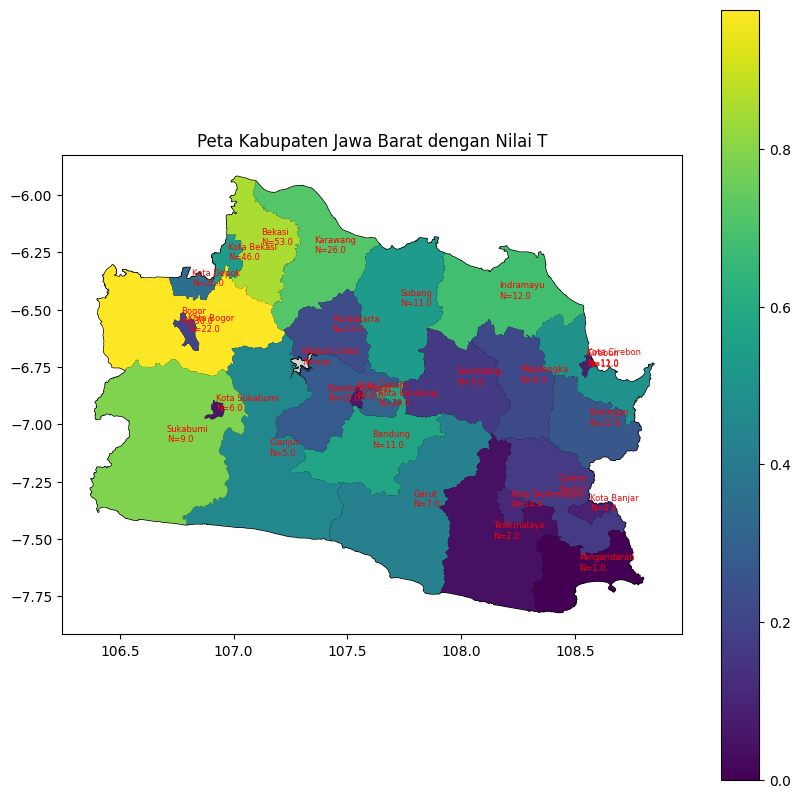

In [ ]:
# Visualisasi peta dengan data T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Peta Kabupaten Jawa Barat dengan Nilai T')

# Plot data kabupaten
dfplt.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot data T
dfplt.plot(column='T', cmap='viridis', legend=True, ax=ax)

for idx, row in dfplt.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['Kabupaten']}\nN={row['Jumlah_RS']}", fontsize=6, color="red")

plt.savefig('Peta T.png')
plt.show()

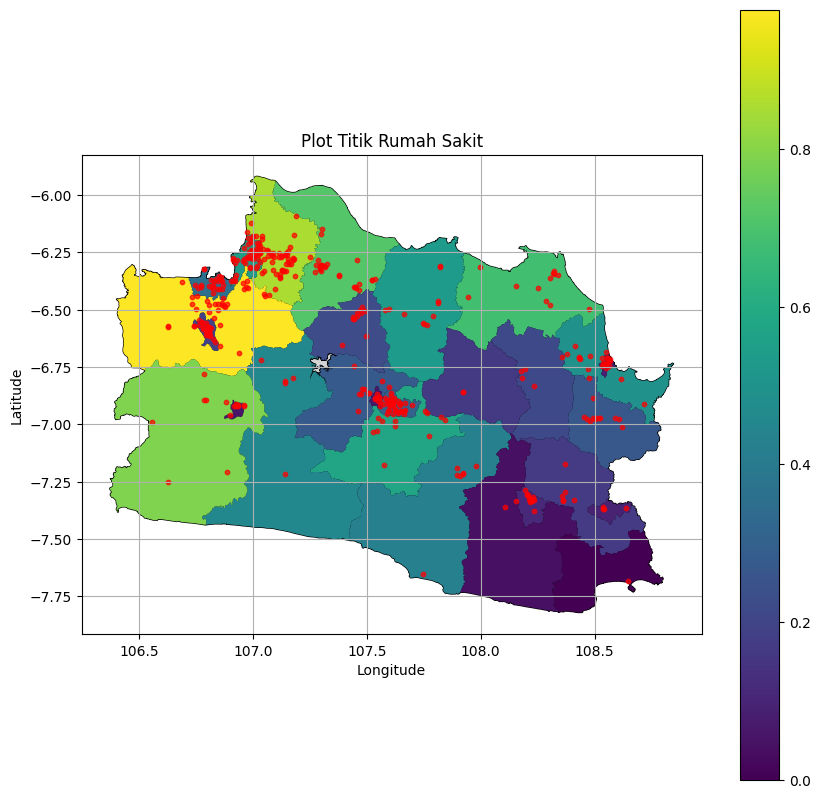

In [ ]:
# Visualisasi peta dengan data T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Peta Kabupaten Jawa Barat dengan Nilai T')

# Plot data kabupaten
dfplt.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot data T
dfplt.plot(column='T', cmap='viridis', legend=True, ax=ax)

# Plot titik rumah sakit beserta nilai T
plt.scatter(DataRS['X'], DataRS['Y'], s=10, c="red", alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot Titik Rumah Sakit')
plt.grid(True)

plt.savefig('Peta Sebaran Titik.png')
plt.show()
